In [33]:
# Read and structure experiment data csv
import csv
import numpy as np

exp_data = []

filenamestr='100_randoms.csv'
exp_data = {}
exp_data["base"] = []
exp_data["enhanced"] = []
with open(filenamestr) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        subtrial = {}
        if line_count == 0:
            line_count += 1
        else:
            # subtrial{trial_id, duration, AA{}, GDX{}, ZIP{}, SNPR{}}
            subtrial["trial_id"] = row[0]
            subtrial["duration"] = row[1]
            csv_column_offset   = 2
            num_cols_per_trader = 4
            # trader_stats{balance, num_traders, profit_per}
            for j in range(0,4):
                row_id = j * num_cols_per_trader + csv_column_offset
                trader_type                 = row[row_id]
                trader_stats = {}
                trader_stats["balance"]     = float(row[row_id + 1])
                trader_stats["num_traders"] = int(row[row_id + 2])
                trader_stats["profit_per"]  = float(row[row_id + 3])
                subtrial[trader_type] = trader_stats

            line_count += 1
        if (line_count - 1) % 2 == 1 and line_count > 1:
            exp_data["base"].append(subtrial)
        elif line_count > 1: 
            exp_data["enhanced"].append(subtrial)
# Reference guide to experiment data structure:
# exp_data[s_d_schedule_num]["base/enhanced"][trial_num]["trial_id/duration/AA/GDX/ZIP/SNPR"]['profit_per']
# if trader_code last field is a dict [balance/num_traders/profit_per]
print('Reading in completed.')

Reading in completed.


In [59]:
avg_enhanced_profit  = []
avg_all_profit       = []
avg_even_prob_profit = []
enhanced_types       = []


en_current_exp_data = exp_data["enhanced"]
ba_current_exp_data = exp_data["base"]
for en in en_current_exp_data:
    # Determine type of enhanced trader
    enhanced_type = ''
    list_index = en_current_exp_data.index(en)
    ba = ba_current_exp_data[list_index]
    types = [" AA", " GDX", " ZIP", " SNPR"]
    ba_trader_nums = []
    en_trader_nums = []
    tot_trader_num = 0
    aepp = 0
    aap  = 0
    for tr_type in types:
        if (en[tr_type]["num_traders"] > ba[tr_type]["num_traders"]):
            enhanced_type = tr_type
            enhanced_types.append(enhanced_type)
    ba_trader_nums.append(ba[tr_type]["num_traders"])
    en_trader_nums.append(en[tr_type]["num_traders"])
    tot_trader_num += int(en[tr_type]["num_traders"])
    aap  += float(en[tr_type]["balance"])
    #aepp += 0.25 * float(en[tr_type]["profit_per"])

    avg_enhanced_profit.append(en[enhanced_type]["profit_per"])
    avg_all_profit.append((aap / tot_trader_num))
    #avg_even_prob_profit.append(aepp)
            

def type_to_colour(typestring):
    aa_colour   = '#b95a00' # Brown
    gdx_colour  = '#a900df' # Purple
    zip_colour  = '#087e3e' # Dark green
    snpr_colour = '#ff0000' # Red
    if typestring   == ' AA' :
        return aa_colour
    elif typestring == ' GDX':
        return gdx_colour
    elif typestring == ' ZIP':
        return zip_colour
    else:
        return snpr_colour
    
enhanced_types_colours = list(map(type_to_colour, enhanced_types))
type_sorted_aep  = {}
type_sorted_aap  = {}
type_sorted_aepp = {}
type_sorted_aep['AA']   = []
type_sorted_aep['GDX']  = []
type_sorted_aep['ZIP']  = []
type_sorted_aep['SNPR'] = []
type_sorted_aap['AA']   = []
type_sorted_aap['GDX']  = []
type_sorted_aap['ZIP']  = []
type_sorted_aap['SNPR'] = []
# 3 presented separate schedules: [1820:3185]
i = 0
for x in avg_enhanced_profit:
    if enhanced_types[i] == ' AA':
        type_sorted_aep['AA'].append(x)
    elif enhanced_types[i] == ' GDX':
        type_sorted_aep['GDX'].append(x)
    elif enhanced_types[i] == ' ZIP':
        type_sorted_aep['ZIP'].append(x)
    else:
        type_sorted_aep['SNPR'].append(x)
    i += 1
    
i = 0
for x in avg_all_profit:
    if enhanced_types[i] == ' AA':
        type_sorted_aap['AA'].append(x)
    elif enhanced_types[i] == ' GDX':
        type_sorted_aap['GDX'].append(x)
    elif enhanced_types[i] == ' ZIP':
        type_sorted_aap['ZIP'].append(x)
    else:
        type_sorted_aap['SNPR'].append(x)
    i += 1

print('Data sorted and ranked.')
# Compare avg profit with avg profit of traders in market
# Compare avg profit with avg profit if type was selected with even probability

Data sorted and ranked.


Extra efficiency line fit coefficient: 2.2531007298370813


/home/bmiki/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


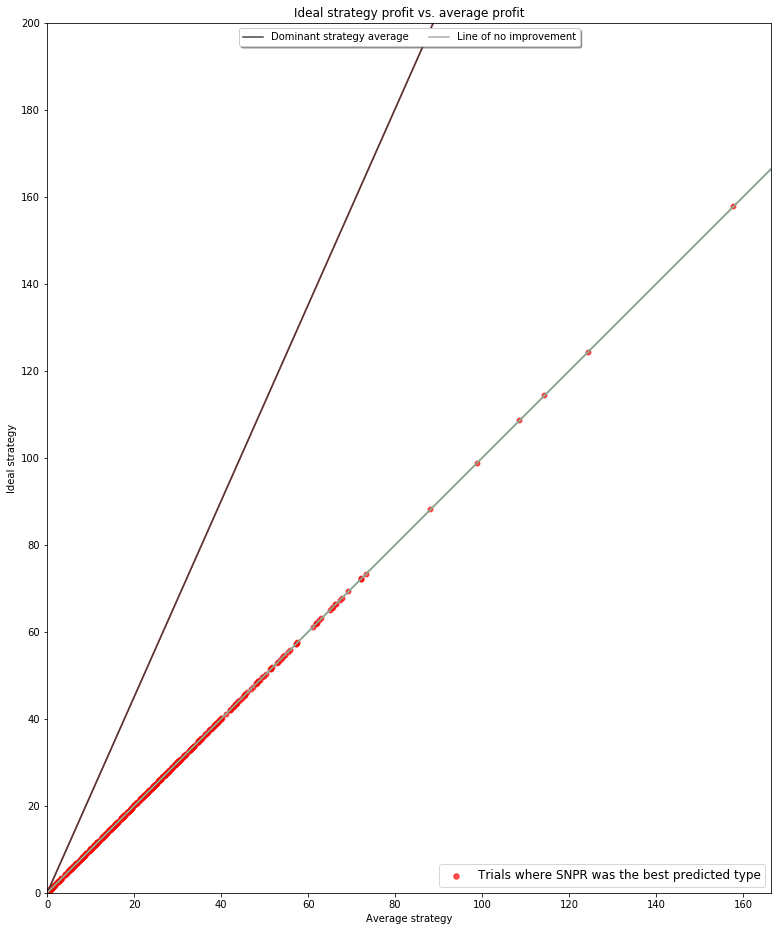

In [63]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# # Average every 5 trial - they had the same trader ratios
# for schedule in range(0, 13):
#     for ratio in range(0, 455):
#         # Average Enhanced Profit, Average All Profit, Average Even Probability Profit
#         aep_ratio_avg  = 0
#         aap_ratio_avg  = 0
#         aepp_ratio_avg = 0
#         for count in range(0, 5):
#             current_id = (schedule * 455 * 5) + (ratio * 5) + count
#             aep_ratio_avg += avg_enhanced_profit[current_id]
#print(avg_enhanced_profit)
#print(avg_all_profit)
# fig.subplots_adjust(top=0.8)
equal_line_x = [0, 300]
equal_line_y = [0, 300]

lr = LinearRegression(fit_intercept=False)
linreg_enhanced_list = avg_all_profit.copy()
linreg_enhanced_array = np.array(linreg_enhanced_list)
linreg_enhanced_array = linreg_enhanced_array.reshape(-1, 1)
lr.fit(linreg_enhanced_array, avg_enhanced_profit)
least_squares_coeff = lr.coef_[0]
print("Extra efficiency line fit coefficient:", least_squares_coeff)
coeff_line_x = [0, 300]
coeff_line_y = [0, 300*least_squares_coeff]

plt.figure(figsize=(16,16))
plt.xticks(range(0,320,20))
plt.yticks(range(0,420,20))
sc_marker = 'o'
sc_marker_size=24

#gdx_dots = plt.scatter( type_sorted_aap['GDX'],  type_sorted_aep['GDX'],  sc_marker_size, c='#a900dfaa', marker=sc_marker)
#zip_dots = plt.scatter( type_sorted_aap['ZIP'],  type_sorted_aep['ZIP'],  sc_marker_size, c='#087e3eaa', marker=sc_marker)
#aa_dots = plt.scatter(  type_sorted_aap['AA'],   type_sorted_aep['AA'],   sc_marker_size, c='#b92a00aa', marker=sc_marker)
snpr_dots = plt.scatter(type_sorted_aap['SNPR'], type_sorted_aep['SNPR'], sc_marker_size, c='#ff0000aa', marker=sc_marker)
plt.title("Ideal strategy profit vs. average profit")
plt.ylabel("Ideal strategy")
plt.xlabel("Average strategy")
plt.ylim(bottom=0, top=200)
plt.xlim(left=0)
plt.axes().set_aspect('equal')
plt.plot(equal_line_x, equal_line_y, c="g")
plt.plot(coeff_line_x, coeff_line_y, c='r')
# Add legend
#lgnd = plt.legend((aa_dots, zip_dots, gdx_dots, snpr_dots),
           #('AA', 'ZIP', 'GDX', 'SNPR'), fontsize = 12)
lgnd = plt.legend([snpr_dots],
           ['Trials where SNPR was the best predicted type'], fontsize = 12, loc='lower right')
lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]
#lgnd.legendHandles[3]._sizes = [30]
ax = plt.subplot(111)
ax.plot(coeff_line_x, coeff_line_y, label='Dominant strategy average', c="#444444")
ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',    c='#aaaaaa')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.add_artist(lgnd)
plt.show()
    
    